In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression ,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error
from scipy import stats

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
df.head(5)

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

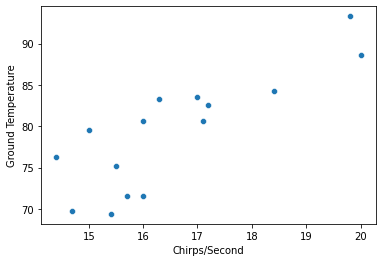

In [ ]:
#plotting the data to see if it has correlation between the variables.
sns.scatterplot(data=df,x="Chirps/Second",y="Ground Temperature") #we can clearly see that the data follows a linear pattern.

In [ ]:
#We can see that the temperature has an significant effect on the chirps of the birds. hence we are considering the temperature as independant variable.

In [ ]:
y=df['Chirps/Second']
x=df["Ground Temperature"]


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
slope,intercept,_,_,_=stats.linregress(x_train,y_train)
def slopfunction(x):
    return (slope*x)+intercept
print(slope, intercept)

0.19353629061482766 1.167731872024092


In [ ]:
predicted_ytr=list(map(slopfunction,x_train))
predicted_yte=list(map(slopfunction,x_test))
print(r2_score(y_train,predicted_ytr))
print(r2_score(y_test,predicted_yte))

0.5795708401526579
0.7986678171941258


In [ ]:
#r2 score almost reaches 0.798 which is good for the model and the model is not overfitted by comparing r2 for train and test dataset also we can observe from below graphs

In [ ]:
#The below split almost gave a r2 score for test dataset to 0.77 so we are saving the datasets incase of future use. The model shows significant results with test-train split
best_splitx=x_train
best_splity=y_train
best_testsplitx=x_test
best_testsplity=y_test
print(best_splitx)
print(best_splity)
print(best_testsplitx)
print(best_testsplity)

4     80.6
1     71.6
13    83.5
0     88.6
14    76.3
9     83.3
8     69.4
12    80.6
11    82.6
5     75.2
Name: Ground Temperature, dtype: float64
4     17.1
1     16.0
13    17.0
0     20.0
14    14.4
9     16.3
8     15.4
12    16.0
11    17.2
5     15.5
Name: Chirps/Second, dtype: float64
3     84.3
7     71.6
6     69.7
2     93.3
10    79.6
Name: Ground Temperature, dtype: float64
3     18.4
7     15.7
6     14.7
2     19.8
10    15.0
Name: Chirps/Second, dtype: float64


Text(0.5, 0, 'temperature')

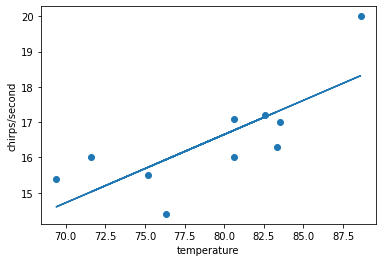

In [ ]:
plt.plot(x_train,predicted_ytr)
plt.scatter(x_train,y_train)
plt.ylabel('chirps/second')
plt.xlabel('temperature')

Text(0.5, 0, 'temperature')

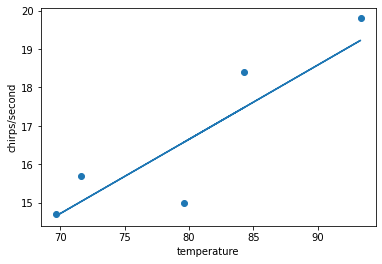

In [ ]:
plt.plot(x_test,predicted_yte)
plt.scatter(x_test,y_test)
plt.ylabel('chirps/second')
plt.xlabel('temperature')

In [ ]:
#to Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
#using the slope and intercept to find the x. 
chirps_at_95=slopfunction(95)
print("when the temperature is 95 the chirps per second would be around {}".format(chirps_at_95))
temp_for_18chirps= (18-intercept)/slope
print("When the temperature is {},no of chirps per second would be 18.".format(temp_for_18chirps))

when the temperature is 95 the chirps per second would be around 19.55367948043272
When the temperature is 86.97215428952897,no of chirps per second would be 18.


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_fwf("/content/drive/MyDrive/Guvi_collab/brain_body.txt")
df.head(5)

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


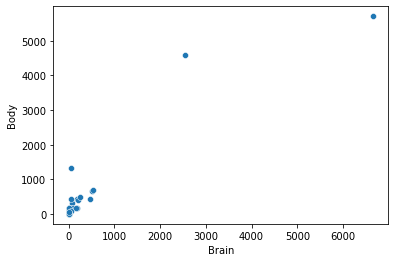

In [ ]:
sns.scatterplot(data=df,x='Brain',y='Body')

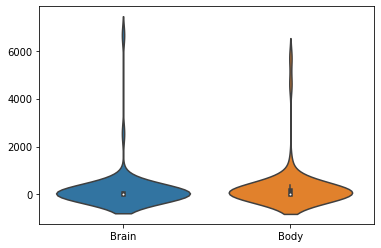

In [ ]:
sns.violinplot(data=df) # checking the outliers in our data.

We can observe that there are some outliers in our data which affects the model while fitting. Hence as a pre-processing step we are clearing out the outliers. 

In [ ]:
df=df.loc[df['Body']<=1000]
x=df['Brain']
y=df['Body']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
slope,intercept,_,_,_=stats.linregress(x_train,y_train)
def slopfunction(x):
    return (slope*x)+intercept
print(slope, intercept)

1.144694836699981 34.88724333511909


The perfect r2 score was yielded when the m=1.144694836699981 and C=34.88724333511909




In [ ]:
ytrain_pred=list(map(slopfunction,x_train))
ytest_pred=list(map(slopfunction,x_test))
print(r2_score(y_train,ytrain_pred))
print(r2_score(y_test,ytest_pred))

0.7394598008503943
0.8153722023323954


In [ ]:
best_splitx=x_train
best_splity=y_train
best_testsplitx=x_test
best_testsplity=y_test
print(best_splitx)
print(best_splity)
print(best_testsplitx)
print(best_testsplity)

33      3.500
17      1.700
19      0.023
30      0.750
42      2.500
57    160.000
47      0.550
16      2.000
8       4.190
54      0.048
53      0.122
14      0.060
4      36.330
3     465.000
13      0.005
2       1.350
43     55.500
46     10.550
52      0.075
44    100.000
50      4.288
0       3.385
28    207.000
58      0.900
1       0.480
48     60.000
10      0.101
11      0.920
5      27.660
49      3.600
60      0.104
56      3.000
22      0.785
26      1.410
37      0.120
9       0.425
23     10.000
35     35.000
61      4.235
34      6.800
59      1.620
15      3.500
40      1.400
27    529.000
38      0.023
45     52.160
36      4.050
Name: Brain, dtype: float64
33      3.90
17      6.30
19      0.30
30     12.30
42     12.10
57    169.00
47      2.40
16     12.30
8      58.00
54      0.33
53      3.00
14      1.00
4     119.50
3     423.00
13      0.14
2       8.10
43    175.00
46    179.50
52      1.20
44    157.00
50     39.20
0      44.50
28    406.00
58      2.60
1 

Text(0.5, 0, 'Brain weight')

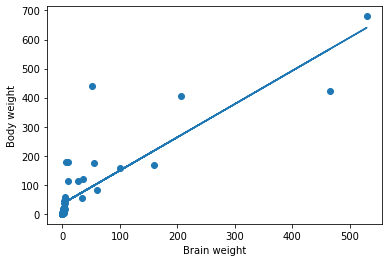

In [ ]:
plt.plot(x_train,ytrain_pred)
plt.scatter(x_train,y_train)
plt.ylabel('Body weight')
plt.xlabel('Brain weight')

Text(0.5, 0, 'Brain weight')

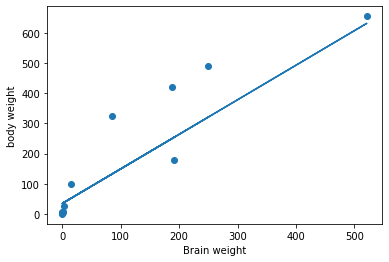

In [ ]:
plt.plot(x_test,ytest_pred)
plt.scatter(x_test,y_test)
plt.ylabel('body weight')
plt.xlabel('Brain weight')

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
df = pd.read_fwf("/content/drive/MyDrive/Guvi_collab/salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df.head(5)

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


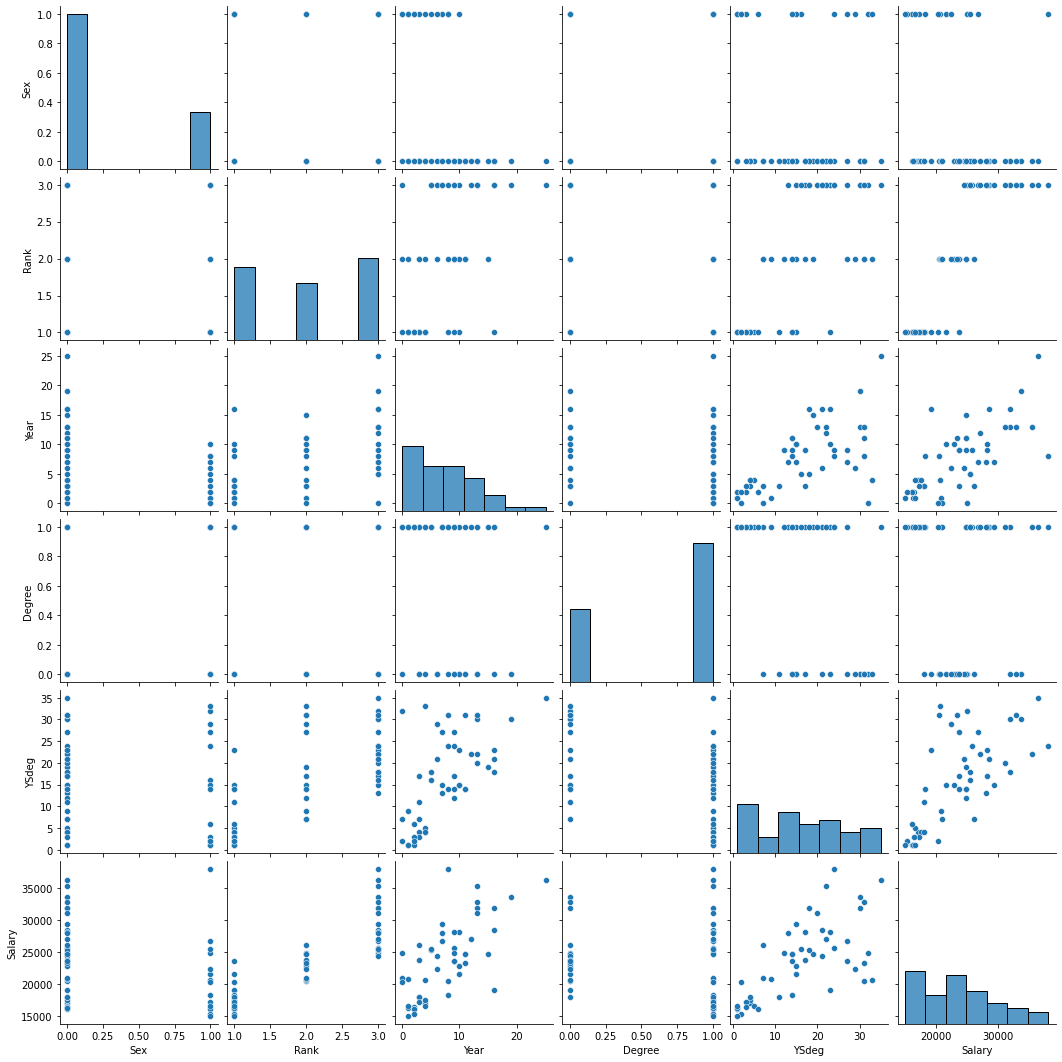

In [ ]:
sns.pairplot(df)

In [ ]:
x=df.drop(['Salary'],axis=1)
y=df['Salary']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30) #splitting data into 70-30


In [ ]:
for i in range(0,1): #for loop to iterate the model
  lr=LinearRegression()   #creating an instance 
  lr.fit(x_train,y_train)    #fitting a model to the dataset
  predicted_values=lr.predict(x_test)   #using the model to predict values

In [ ]:
print('coefficient',lr.coef_)
print('intercept',lr.intercept_)

coefficient [1645.51557513 5622.94984605  529.67048034 -842.73284201 -139.764175  ]
intercept 10872.074186000362


In [ ]:
ytrain_pred=lr.predict(x_train)
ytest_pred=lr.predict(x_test)
print('R2 score for train:',r2_score(y_train,ytrain_pred))
print('R2 score for test:',r2_score(y_test,ytest_pred))

R2 score for train: 0.8347290525253991
R2 score for test: 0.881088399680265


In [ ]:
best_splitx=x_train
best_splity=y_train
best_testsplitx=x_test
best_testsplity=y_test
print(best_splitx)
print(best_splity)
print(best_testsplitx)
print(best_testsplity)

    Sex  Rank  Year  Degree  YSdeg
38    0     1     4       1      5
28    0     2     3       0      7
39    0     1     4       1      4
27    1     3     5       1     16
40    0     1     3       1      4
19    0     3     6       0     21
26    0     2    11       1     14
50    1     1     1       1      1
12    0     3     9       1     17
43    1     1     3       1      3
13    0     2     9       0     27
37    0     1     4       1      4
16    0     3    13       1     20
18    0     2    10       0     15
2     0     3    10       1     23
42    0     2     0       1      7
8     0     3    13       0     30
10    0     3    12       1     22
29    0     2     3       0     17
48    0     1     1       1      1
44    0     1     2       1      3
30    1     1    10       0     15
1     0     3    13       1     22
4     0     3    19       0     30
24    0     2     9       1     12
46    1     1     2       1      6
21    0     2     8       0     31
6     1     3     0 

We can see that when considering all the columns as indeoendant variable and fitting the model, we are getting an r2 score above 0.84. 

In [ ]:
# below we'll fit the data by excluding the 'Sex' column to find whether it plays major role in the prediction of 

In [ ]:
#We are splitting with the same dataset which yields higher r2 score for the previous

x1_train=best_splitx.drop(['Sex'],axis=1)
y1_train=best_splity
x1_test=best_testsplitx.drop(['Sex'],axis=1)
y1_test=best_testsplity

In [ ]:
r2score_tst=[]
r2score_train=[]
for i in range(0,5):
  lr=LinearRegression()
  lr.fit(x1_train,y1_train)  
  y1train_pred=lr.predict(x1_train)
  y1test_pred=lr.predict(x1_test)
  r2score_tst.append(r2_score(y1test_pred,y1_test))
  r2score_train.append(r2_score(y1train_pred,y1_train))

r2test_avg=sum(r2score_tst)/len( r2score_tst)
r2train_avg=sum(r2score_train)/len( r2score_train)
print("Test r2 avg score without considering gender:",r2test_avg)
print("Train r2 avg score without considering gender:",r2train_avg)

Test r2 avg score without considering gender: 0.8863446367688221
Train r2 avg score without considering gender: 0.7826914664140121


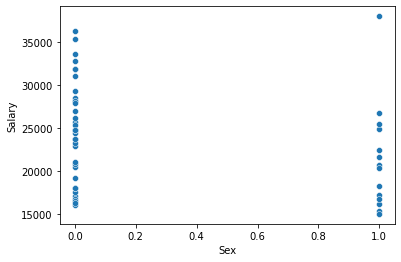

In [ ]:
#to further rest our case we'll plot a correlation plot between 2 variables.
sns.scatterplot(data=df,x='Sex',y='Salary')

**conclusion** : As we can observe from the graph as well as the model we fitted with the same split without 'Sex' variable clearly indicates there wasn't any significance effect to the 'Salary' variable. The Average R2 score for 5 iterations without 'Sex' variable is nearly equal as previous model when including the 'Sex' variable. 